## Amount Monthly Account

In [9]:
# diagram.py
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3
from diagrams.onprem.compute import Server
from diagrams.aws.database import Aurora
from urllib.request import urlretrieve
from diagrams.custom import Custom

In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

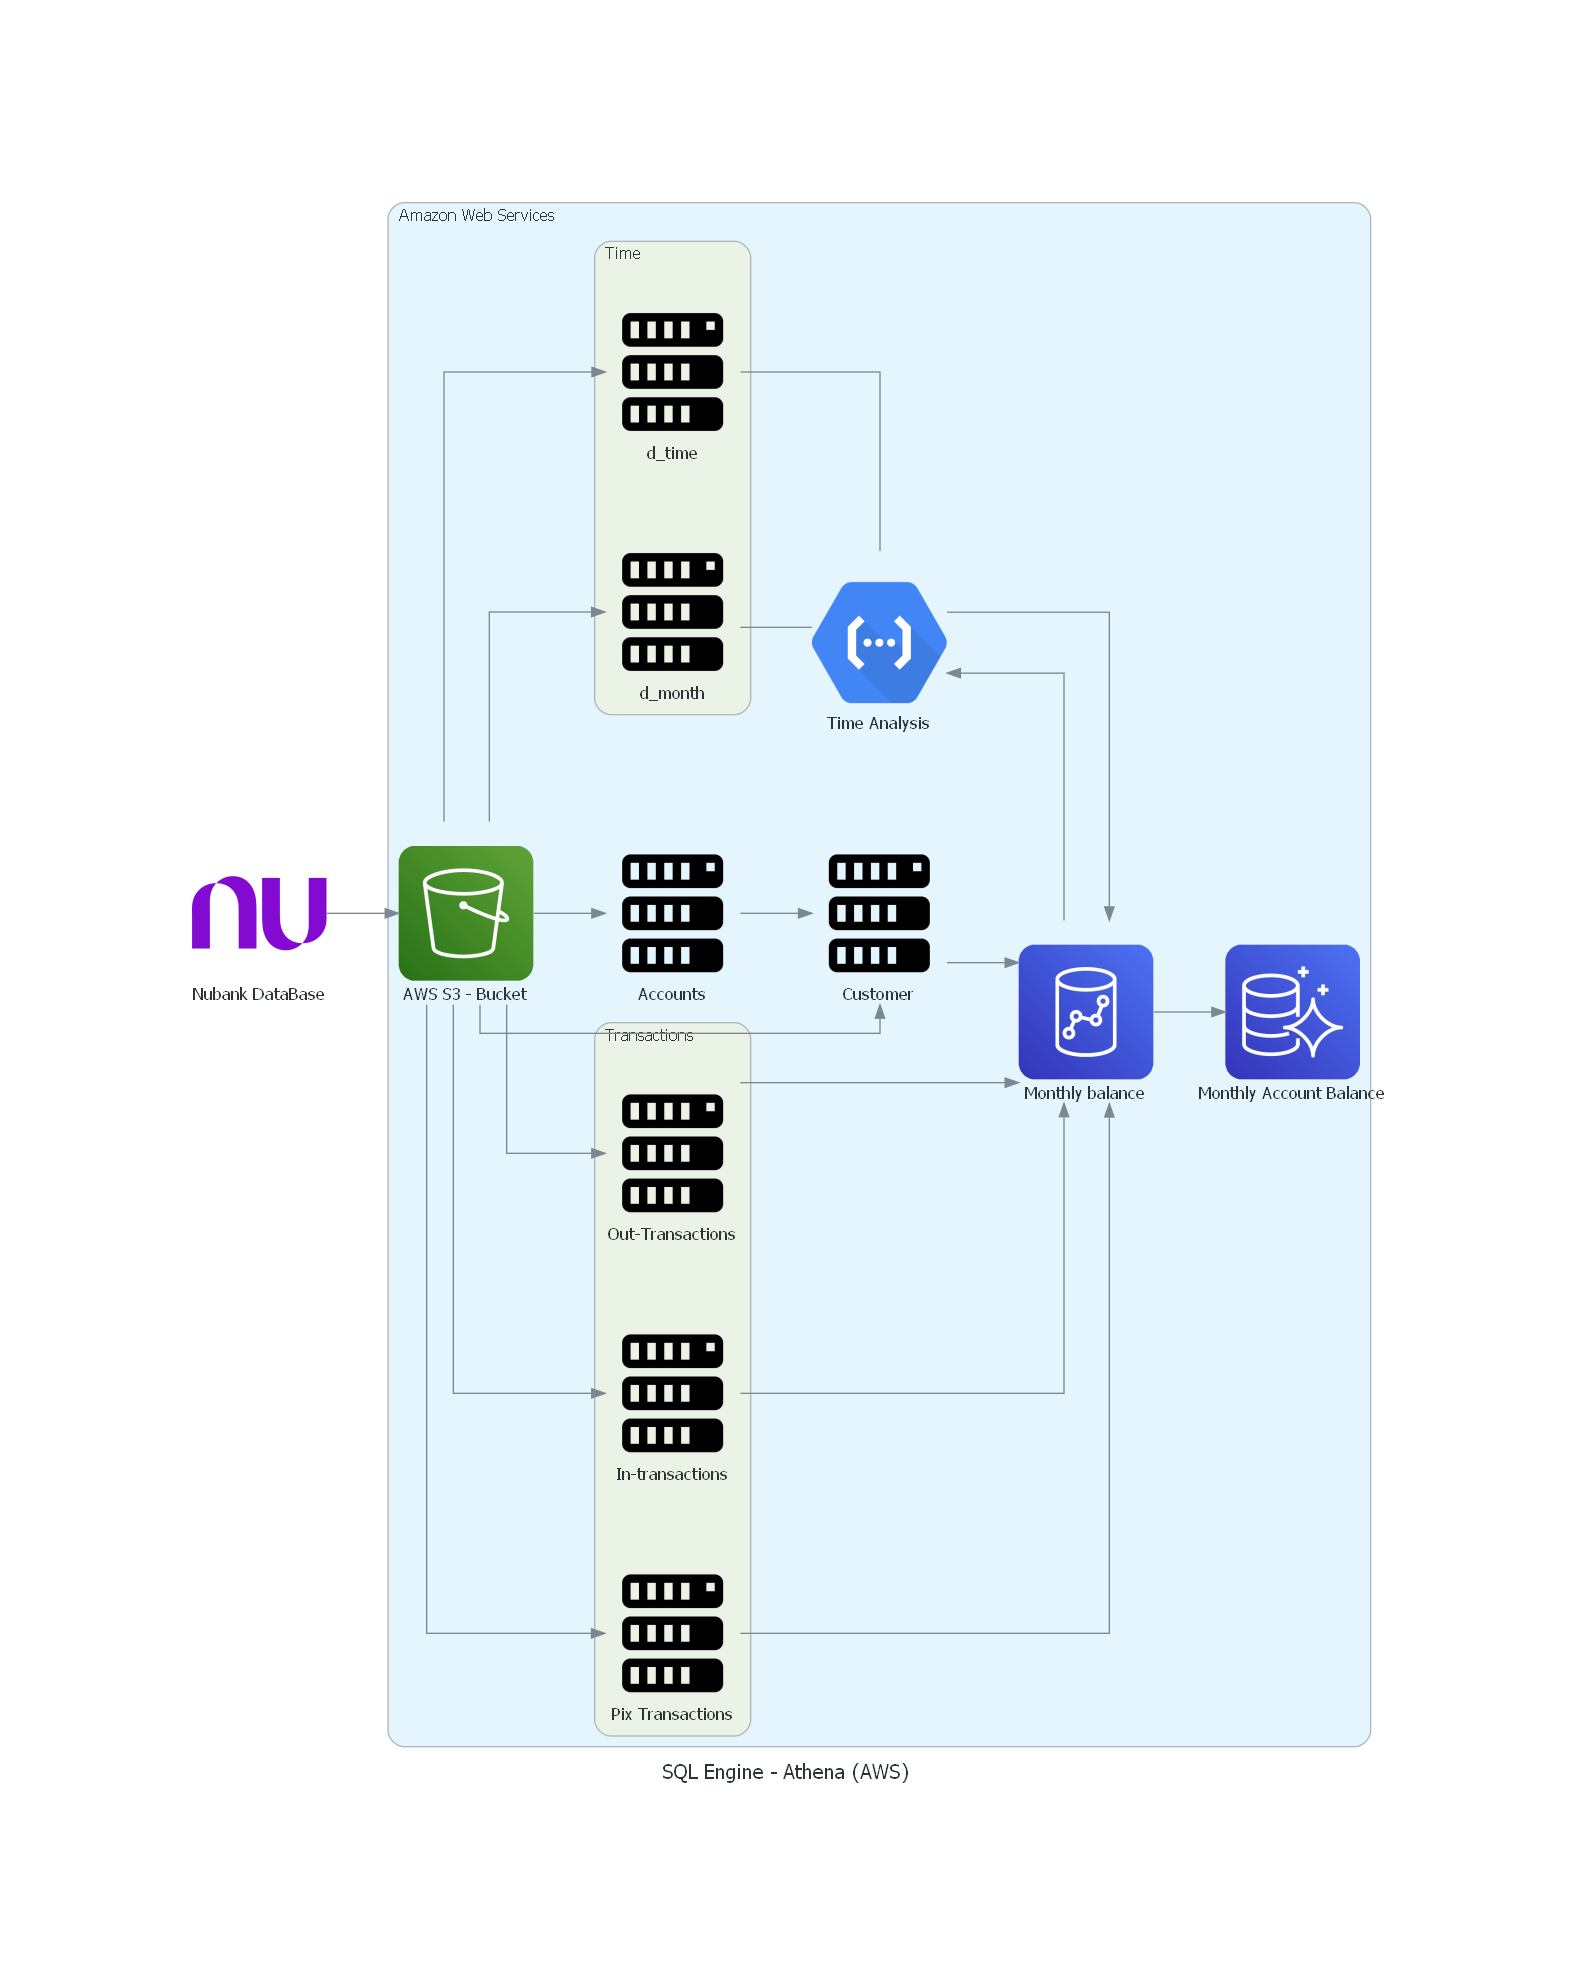

In [11]:
nubank_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Nubank_logo_2021.svg/800px-Nubank_logo_2021.svg.png"
nubank_icon = "nubank.png"
urlretrieve(nubank_url, nubank_icon)


with Diagram("SQL Engine - Athena (AWS)", show = False) as diag:
    queue = Custom("Nubank DataBase", nubank_icon)
    with Cluster("Amazon Web Services"):
        store = S3("AWS S3 - Bucket")
        queue >> store
        with Cluster("Transactions"):
            grpcsvc = [
                Server("Pix Transactions"),
                Server("In-transactions"),
                Server("Out-Transactions")]
            store >> grpcsvc
        dw = Redshift("Monthly balance")
        grpcsvc >> dw
        Accounts = Server("Accounts")
        store >> Accounts
        Customer = Server("Customer")
        store >> Customer
        with Cluster("Time"):
            time = [
                Server("d_time"),
                Server("d_month")]
            store >> time
        
        time_analysis = Functions("Time Analysis")
        merge_time = [time - time_analysis << dw]
        
        AMB = Accounts >> Customer >> dw
        
        time_analysis >> AMB >> Aurora("Monthly Account Balance")

diag

## New Data WareHouse

In [190]:
# diagram.py
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda,  EC2
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.aws.database import Redshift, Aurora
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3
from diagrams.onprem.compute import Server
from diagrams.k8s.storage import PV, PVC, StorageClass
from diagrams.gcp.storage import GCS
from diagrams.gcp.database import BigTable

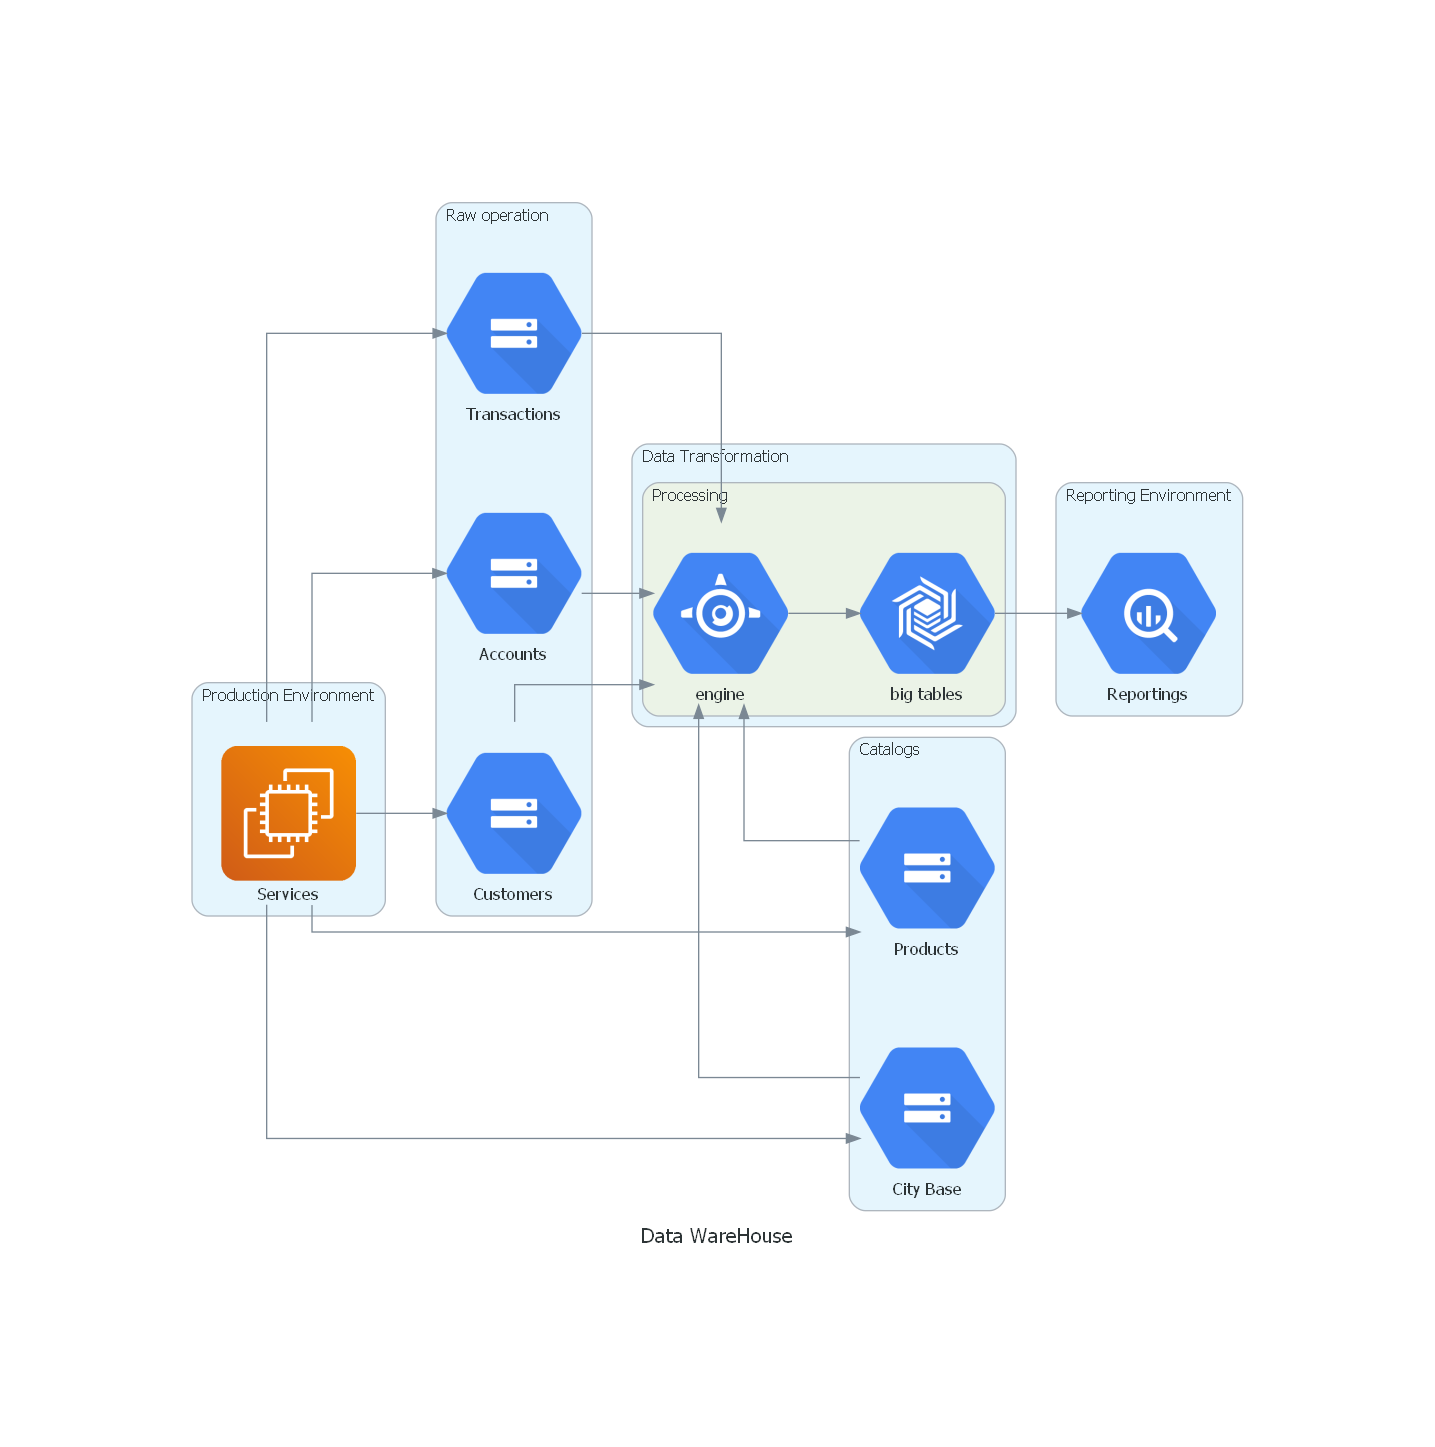

In [202]:
with Diagram("Data WareHouse", show = False) as diag:
    with Cluster("Production Environment"):
        services=EC2("Services")
        
    with Cluster("Raw operation"):
        data = [GCS("Customers"),
                GCS("Transactions"),
                GCS("Accounts")]
        services >> data
    
    with Cluster("Catalogs"):
        cat = [GCS("Products"),
                GCS("City Base")]
        services >> cat 
        
    with Cluster("Data Transformation"):
            with Cluster("Processing"):
                process = AppEngine("engine")
                table = BigTable("big tables")
                data >> process << cat
                process >> table
                
    with Cluster("Reporting Environment"):
        reports=BigQuery("Reportings")
        table >> reports
        
        
diag